In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer


In [7]:
import os
os.getcwd()

'd:\\Learn-ML-ai\\Statistics'

In [10]:
df = pd.read_csv('../EDA/data/house_price.csv')
df.head()


,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
0,Flat System House On Sale At Budhanikantha : H...,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000,6,3,2.0,10,West,2073.0,17,1-0-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,18-0-0-0 Aana,11 hours ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,21 Aana Beautiful House : House For Sale In Bu...,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000,5,3,2.0,9,East,2073.0,26,0-21-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-0-0 Aana,12 hours ago,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,Beautiful To Floor House : House For Sale In D...,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000,5,3,2.0,12,East,2071.0,154,1-1-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,10-1-0-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,Modern Architecture Bungalow House : House For...,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000,6,4,3.0,9,West,2017.0,17,0-10-1-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-7-1-0 Aana,1 day ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,Modern Bungalow House : House For Sale In Golf...,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000,6,3,2.0,10,East,2070.0,59,0-19-2-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-2-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."


In [16]:
no_of_rooms = pd.DataFrame({'rooms': df['Bedroom'] + df['Bathroom']})

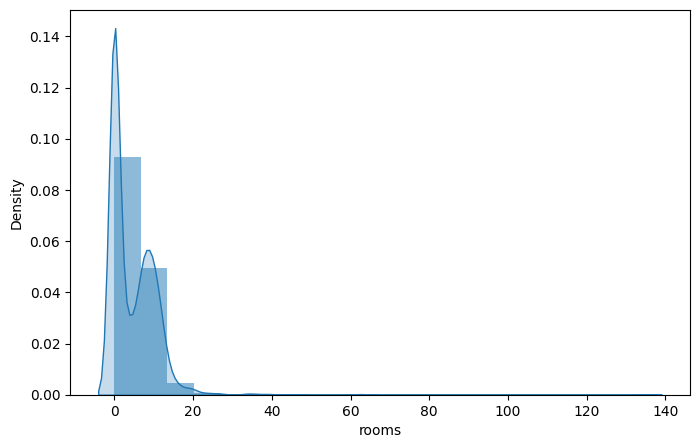

In [25]:
plt.figure(figsize=(8,5))

# Histogram (density=True is important)
plt.hist(no_of_rooms['rooms'], bins=20, density=True, alpha=0.5)

# KDE
sns.kdeplot(no_of_rooms['rooms'], fill=True)

plt.show()

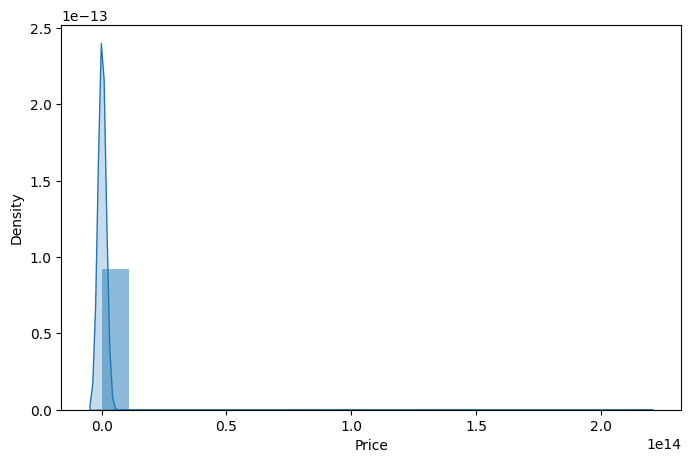

In [27]:
plt.figure(figsize=(8,5))

# Histogram (density=True is important)
plt.hist(df['Price'], bins=20, density=True, alpha=0.5)

# KDE
sns.kdeplot(df['Price'], fill=True)

plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(no_of_rooms, df['Price'], test_size=0.2, random_state=42)

R2 Score before transformation: -0.0003162026555245667
R2 Score after transformation: -0.00034602933512228873


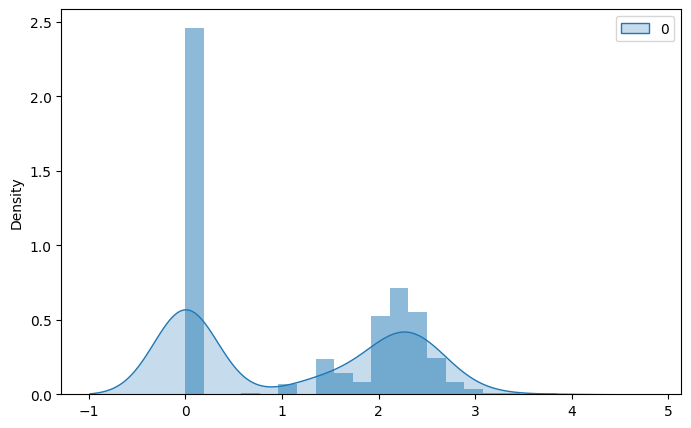

In [33]:
s1 = LinearRegression().fit(X_train, y_train)
s1_pred = s1.predict(X_test)
print("R2 Score before transformation:", r2_score(y_test, s1_pred))
transformer = FunctionTransformer(np.log1p, validate=True)
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.transform(X_test)
s2 = LinearRegression().fit(transformed_X_train, y_train)
s2_pred = s2.predict(transformed_X_test)
print("R2 Score after transformation:", r2_score(y_test, s2_pred))
plt.figure(figsize=(8,5))
# Histogram (density=True is important)
plt.hist(transformed_X_test, bins=20, density=True, alpha=0.5)
# KDE   
sns.kdeplot(transformed_X_test, fill=True)
plt.show()


In [28]:
transformer = FunctionTransformer(np.log1p, validate=True)
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.transform(X_test)

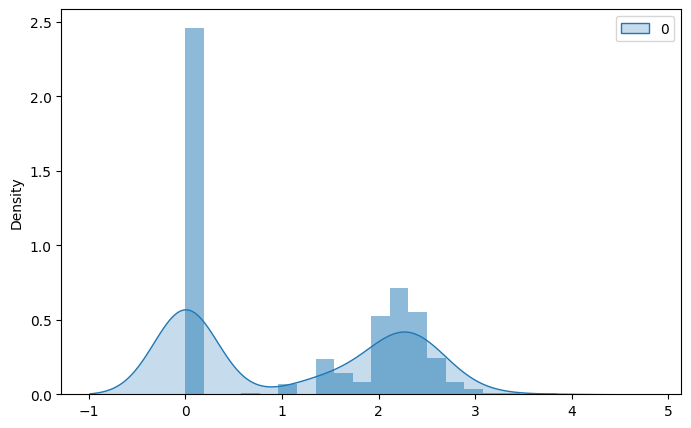

In [29]:
plt.figure(figsize=(8,5))

# Histogram (density=True is important)
plt.hist(transformed_X_test, bins=20, density=True, alpha=0.5)

# KDE
sns.kdeplot(transformed_X_test, fill=True)

plt.show()

In [34]:
accuracy_score(y_test, s1_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets